In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('WHO-COVID-19-global-data.csv')
all_data.head()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1


In [3]:
german_data = all_data[(all_data['Country Name'] == 'Germany') & (all_data['day'] >= '2020-03-01') ]

cumulative_deaths = german_data['Cumulative Deaths']
day = german_data['day']
daily_deaths = german_data['Deaths']

In [4]:
german_data[:7]

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
3846,2020-03-01,DE,Germany,EURO,0,0,72,129
3847,2020-03-02,DE,Germany,EURO,0,0,29,158
3848,2020-03-03,DE,Germany,EURO,0,0,38,196
3849,2020-03-04,DE,Germany,EURO,0,0,66,262
3850,2020-03-05,DE,Germany,EURO,0,0,138,400
3851,2020-03-06,DE,Germany,EURO,0,0,239,639
3852,2020-03-07,DE,Germany,EURO,0,0,156,795


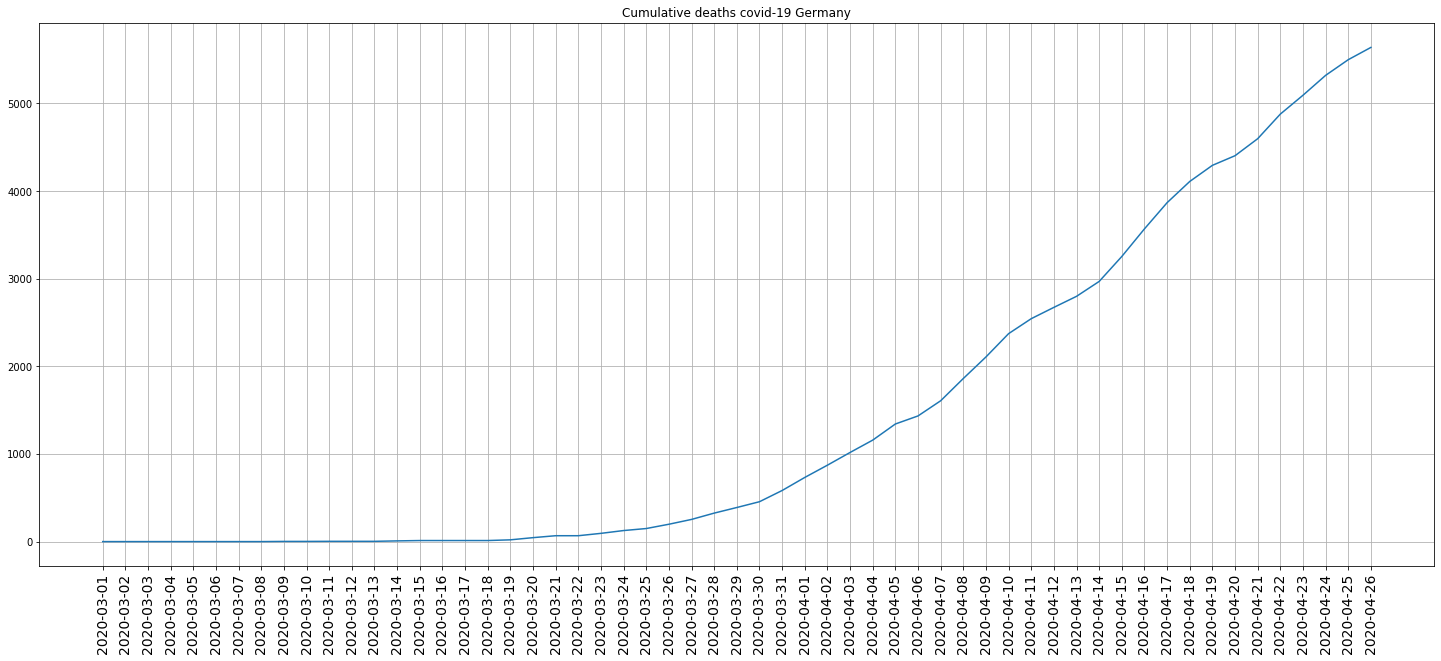

In [5]:
plt.figure(figsize=(25,10))
plt.plot(day, cumulative_deaths)
plt.xticks(day,rotation='vertical', size=14)
plt.title('Cumulative deaths covid-19 Germany')
plt.grid()
plt.show()

In [6]:
def week_data(data, num_week=1):
    return data[:num_week*7]

In [7]:
week_data(german_data,1)

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
3846,2020-03-01,DE,Germany,EURO,0,0,72,129
3847,2020-03-02,DE,Germany,EURO,0,0,29,158
3848,2020-03-03,DE,Germany,EURO,0,0,38,196
3849,2020-03-04,DE,Germany,EURO,0,0,66,262
3850,2020-03-05,DE,Germany,EURO,0,0,138,400
3851,2020-03-06,DE,Germany,EURO,0,0,239,639
3852,2020-03-07,DE,Germany,EURO,0,0,156,795


In [8]:
def get_data_matrix(num_week):
    num_days = num_week*7
    return np.array([np.arange(1,num_days+1, dtype = 'int'),np.ones(num_days,dtype = 'int')]).T
    

In [9]:
def get_cumulative_deaths(data, num_week=1):
    return data[: num_week*7]

In [10]:
#data prediction 

def regression(dep_var,cumulative_deaths):
    predicted_data =[]
    x = np.arange(1,len(cumulative_deaths)+1)
    predicted_data = (dep_var[0]*x) + dep_var[1]
    return predicted_data


In [11]:
def data_prediction(data,num_week):
    A = get_data_matrix(num_week)
    Z = get_cumulative_deaths(data,num_week)
    
    A_t = A.transpose()
    A_t_dot_A = np.dot(A_t,A)
    
    inv_A_t_dot_A = np.linalg.inv(A_t_dot_A)
    x = np.dot(inv_A_t_dot_A,np.dot(A_t,Z))
    
    return regression(x,data)
    

In [12]:
def draw_plot(cumulative_deaths,predicted_data,num_week):
    fig = plt.figure(figsize = (10,10))
    xais =  len(predicted_data)
    plt.plot(np.arange(xais),predicted_data)
    plt.scatter(np.arange(xais),cumulative_deaths, color='red')
    plt.title(f"linear regression approximation using first {num_week} week/s")
    plt.xlabel('Days after 1st march',fontsize=8)
    plt.ylabel('Cumulative death',fontsize=8)
    plt.show()


In [13]:
cumulative_deaths = german_data['Cumulative Deaths'].values

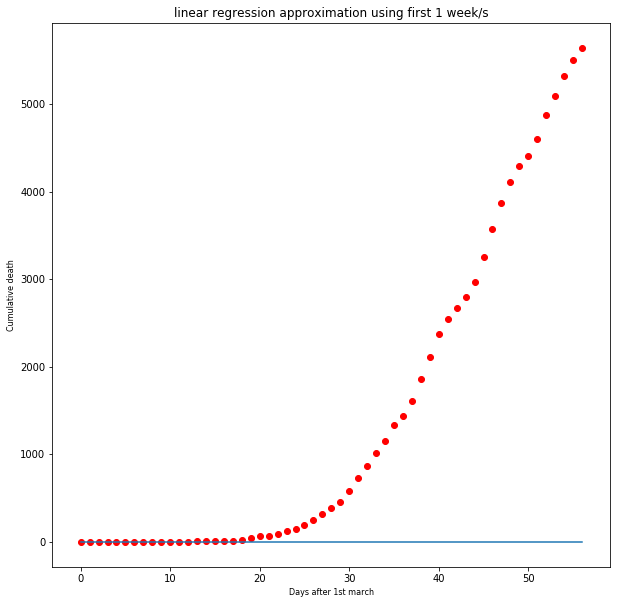

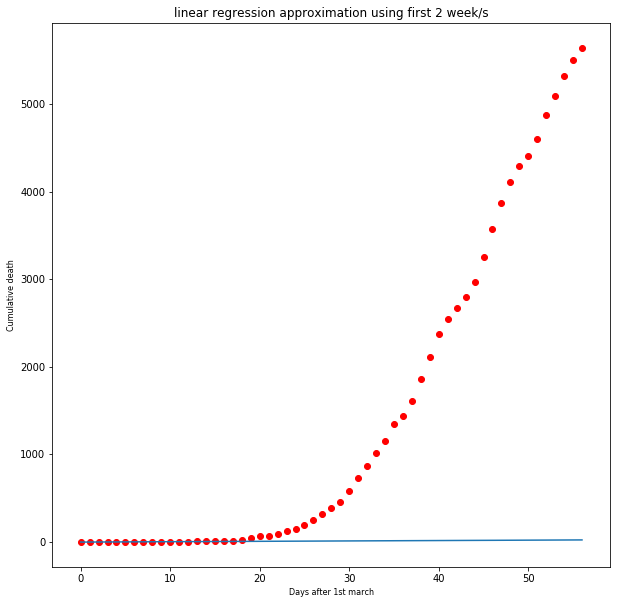

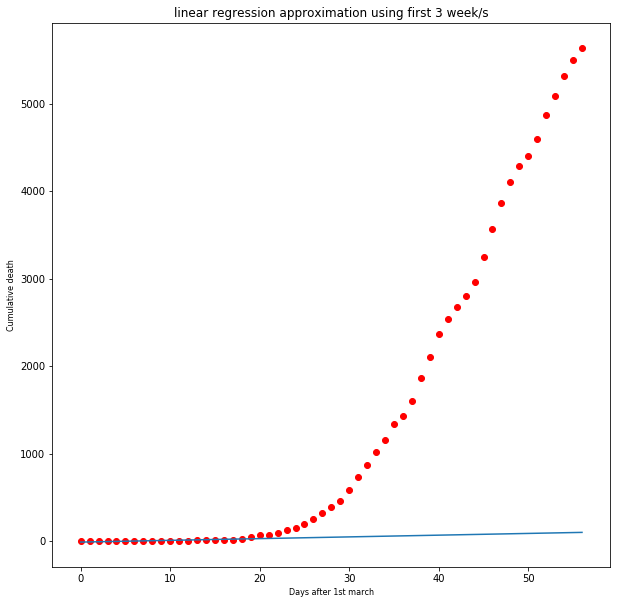

In [14]:
num_weeks = [1,2,3]
for num_week in num_weeks:
    predicated_data = data_prediction(cumulative_deaths,num_week)
    draw_plot(cumulative_deaths,predicated_data,num_week)

## Exercise 2

In [15]:
def create_polynomial_data_matrix(polynomial):
    data_size = len(data)
    i = np.arange(1,data_size+1, dtype=np.float64)
    j = polynomial
    data_matrix = np.zeros((data_size,polynomial+1))
    while j>=0:
        data_matrix[:,j] = i**j
        j -= 1
    return np.flip(data_matrix, axis=1)

In [16]:
data = np.loadtxt("dax_data.txt", comments="#", delimiter="\n")

In [17]:
def dep_variable_cal(poly):
    A = create_polynomial_data_matrix(poly)
    A_t = A.transpose()
    A_t_dot_A = np.dot(A_t,A)
    inv_A_t_dot_A = np.linalg.inv(A_t_dot_A)
    x = np.dot(inv_A_t_dot_A,np.dot(A_t,data))
    return x

In [18]:
def p_regression(dep_var):
    approximate_output_matrix = np.empty(0)
    dep_var = dep_var[::-1]
    i=1;
    while i<=len(data):
        j=0
        result = 0
        while j<len(dep_var):
            result = result+(dep_var[j]*(i**j))
            j += 1
        approximate_output_matrix = np.append(approximate_output_matrix,[result],axis=0)
        i += 1
    return approximate_output_matrix


In [19]:
def approximation(poly):
    x = dep_variable_cal(poly)
    return  p_regression(x)

In [20]:
def draw_graph(poly):
    fig = plt.figure(figsize = (10,10))
    plt.plot(data, label='DAX')
    for p in poly:
        plt.plot(approximation(p),label = f"polynomial-{p}")
        plt.ylabel('DAX data',fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

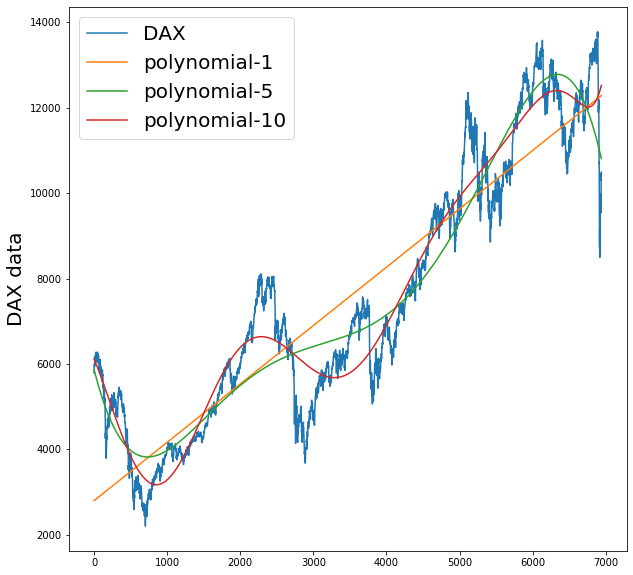

In [21]:
draw_graph(np.array([1,5,10]))

In [22]:
np.array(np.arange(1,11))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

b

In [23]:
fc = np.fft.fft(data)

In [24]:
def get_n_largest_coeff_index(coeff_array,n=1):
    coeff_indices = np.argsort(-np.abs(coeff_array))[:n]
    return coeff_indices

In [25]:
def sample_with_n_largest_coeff(coeff_array,n=1):
    largest_coeff_indices = get_n_largest_coeff_index(coeff_array,n)
    coeff_array_copy = coeff_array.copy()
    for i in range(len(coeff_array)):
        if i not in largest_coeff_indices:
            coeff_array_copy[i]=0 
    return coeff_array_copy

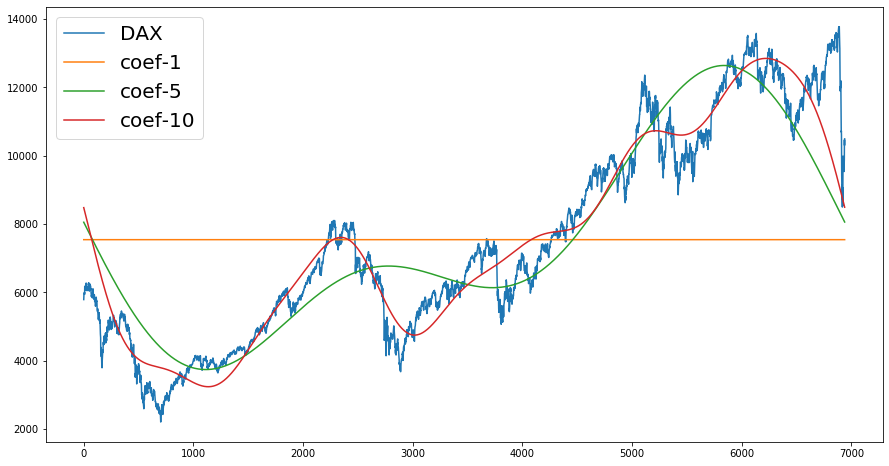

In [26]:
coeff_numbers = [1,5,10]
plt.figure(figsize=(15,8))
plt.plot(data, label= 'DAX')
for coeff_number in coeff_numbers:
    plt.plot(np.fft.ifft(sample_with_n_largest_coeff(fc,coeff_number)).real,label=f'coef-{coeff_number}')

plt.legend(fontsize=20)
plt.show()

In [27]:
def mean_squared_error(approximation_data, real_data):
    n = len(approximation_data)
    sumation = 0
    for i in range(n):
        sumation += (approximation_data[i] - real_data[i])**2
    return (1/n)*sumation
        

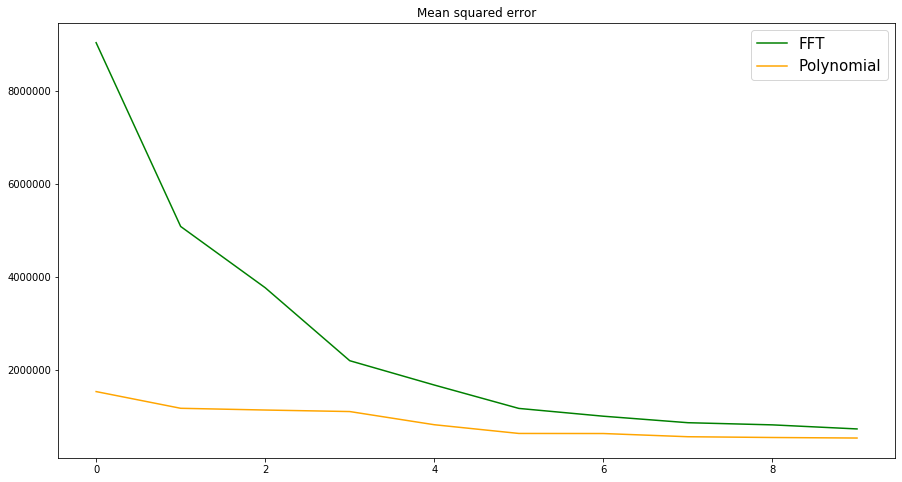

In [28]:
exp = np.array(np.arange(1,11))
poly_error = []
fft_error = []
for ex in exp:
    poly_appro =approximation(ex)
    fft_appro = np.fft.ifft(sample_with_n_largest_coeff(fc,ex)).real
    poly_error = np.append(poly_error,mean_squared_error(poly_appro,data))
    fft_error = np.append(fft_error,mean_squared_error(fft_appro,data))

plt.figure(figsize=(15,8))
plt.title('Mean squared error')
plt.plot(fft_error, color = 'green', label= 'FFT')
plt.plot(poly_error, color = 'orange', label = 'Polynomial')
plt.legend(fontsize = 15)
plt.show()


In [29]:
poly_appro =approximation(1)

In [30]:
poly_appro

array([ 2799.1053935 ,  2800.47219688,  2801.83900026, ...,
       12280.62044066, 12281.98724404, 12283.35404742])

In [32]:
from matplotlib.pyplot import imread,imshow

In [33]:
def get_n_largest_coeff_index(coeff_array,n=1):
    coeff_indices = np.argsort(-np.abs(coeff_array))[:n]
    return coeff_indices

In [34]:
def sample_with_n_largest_coeff(coeff_array,n=1):
    largest_coeff_indices = get_n_largest_coeff_index(coeff_array,n)
    coeff_array_copy = coeff_array.copy()
    for i in range(len(coeff_array)):
        if i not in largest_coeff_indices:
            coeff_array_copy[i]=0 
    return coeff_array_copy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


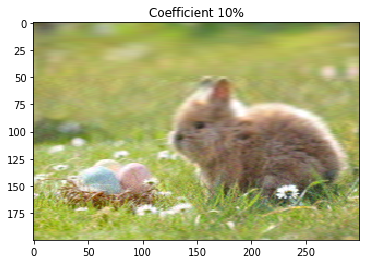

In [35]:
bunny_image = imread('easter.png')
imshow(bunny_image)
fc_for_image = np.fft.fft2(bunny_image)

indice_no = len(fc_for_image.reshape(-1))
experiment_amounts = [indice_no*(10/100), indice_no*(1/100),indice_no*(0.1/100)]
experiment_amounts

n_largest_coef_for_image = sample_with_n_largest_coeff(fc_for_image.reshape(-1),int(experiment_amounts[0])).reshape(bunny_image.shape)
compressed_image = np.fft.ifft2(n_largest_coef_for_image).real
plt.title('Coefficient 10%')
plt.imshow(compressed_image)    

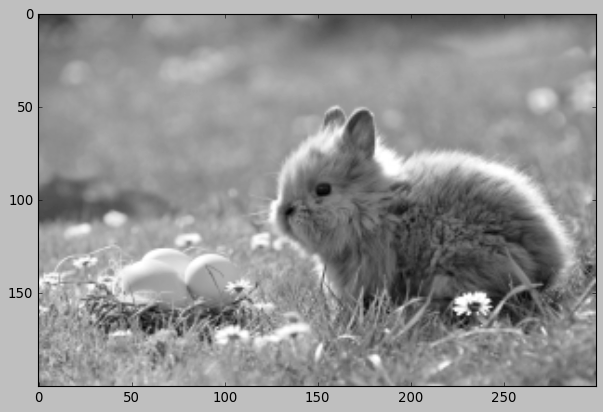

In [37]:
from PIL import Image

plt.style.use('classic')
img = Image.open('easter.png')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [38]:
U, D, V = np.linalg.svd(imgmat)

In [39]:
U.shape

(200, 200)

In [40]:
D.shape

(200,)

In [41]:
V.shape

(300, 300)

In [55]:
imgmat.shape

(200, 300)

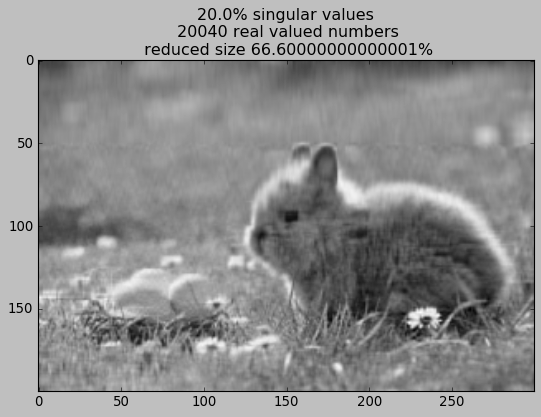

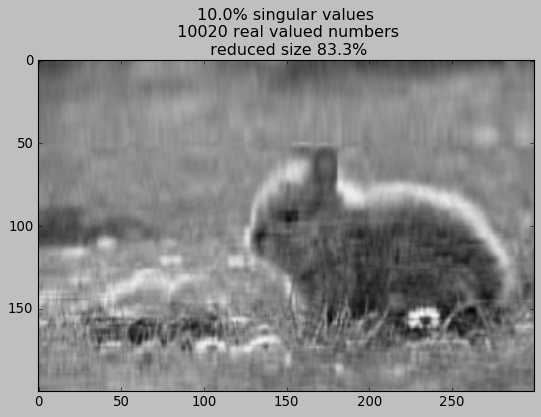

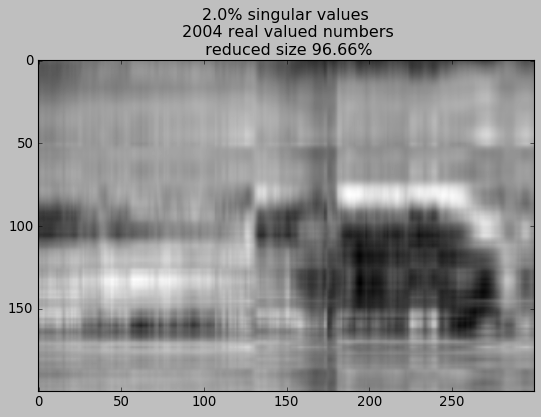

In [76]:
size_d = len(D)
original_img_size = imgmat.size
exp_singularvalues = np.array([20/100*size_d,10/100*size_d,2/100*size_d]).astype(int)
for i in exp_singularvalues:
    percent = i*100/size_d
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    real_Value_size = (reconstimg.shape[0]+reconstimg.shape[1]+1)*i
    reduce_img_size = ((original_img_size - real_Value_size)/(orginal_img_size))*100
    plt.imshow(reconstimg, cmap='gray')
    title = f"{percent}% singular values\n {real_Value_size} real valued numbers\n reduced size {reduce_img_size}%"
    plt.title(title)
    plt.show()

In [58]:
exp_singularvalues

array([40, 20,  4])

In [61]:
reconstimg = np.matrix(U[:, :200]) * np.diag(D[:200]) * np.matrix(V[:200, :])

In [62]:
reconstimg.shape

(200, 300)